## Задача 1. Реализация методов СЛАУ для уравнения Пуассона.


In [11]:
import numpy as np
from scipy.linalg import block_diag
import scipy

Рассмотрим систему линейных уравнений, матрица правой части которой является "ленточной" и имеет следующую структуру: ненулевые элементы расположены на трех центральных диагонялях и на двух "крыльях". Матрицы такой структуры возникают, например, при решении задачи на нахождение электростатического потенциала $\phi(x, y)$, создаваемого двумерным распределением заряда $\rho(x, y)$ при дискретизации на сетке уравнения Пуассона

$$
\Delta \phi=-4 \pi \rho .
$$

(детали см. напр. А.А. Самарский, А.В. Гулин, Численные методы, Ч. 3 гл. 1, параграф 1).
Размер матрицы растет с уменьшением шага сетки $h$ как $O\left(1 / h^2\right)$. Таким образом, приходится иметь дело с разреженными матрицами огромного размера.
Матрицу m создадим следующим образом:

In [27]:
n = 5

# Диагональный блок
a = np.zeros((n-1, n-1))

idx = np.arange(n-1)

a[idx, idx] = -4
a[idx[:-1], idx[:-1]+1] = 1
a[idx[1:], idx[1:]-1] = 1

# собираем блочно-диагональную `m`
m = block_diag(a, a, a, a, a)

# заполняем "крылья"
idx = np.arange(m.shape[0])

m[idx[:-n+1], idx[:-n+1] + n-1] = 1
m[idx[n-1:], idx[n-1:] - n+1] = 1



In [28]:
with np.printoptions(linewidth=99):
    print(m)

[[-4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0

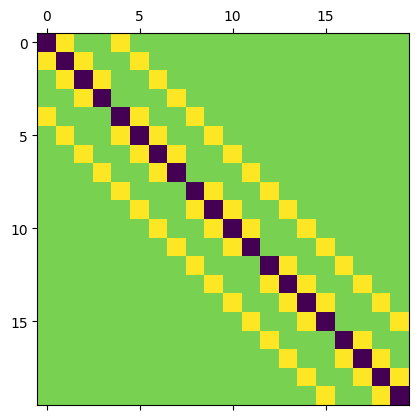

In [6]:
import matplotlib.pyplot as plt
plt.matshow(m)

Зададим вектор правой части системы

In [7]:
b = np.zeros(m.shape[0])
b[m.shape[0]//2] = -1
print(b)


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


Составить функцию, вычисляющую решение системы уравнений $m x=b$ описанными ниже методами с заданной точностью $\epsilon$. Построить в каждом случае зависимость числа итераций, требуемых для достижения заданной точности, от $\epsilon$.

**Первый метод.**

- Создать эту же матрицу с помощью [scipy.sparse.csc_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.html).

- Создать эту же матрицу с помощью [scipy.sparse.diags](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.diags.html).

- Создать эту же матрицу с помощью [scipy.sparse.spdiags](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.sdiags.html).


- Решите полученную систему с помощью встроенного метода прогонки для полосатых матриц (составленных из диагоналей) [scipy.linalg.solve_banded](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_banded.html).

**Второй метод.**

- Решите полученную систему с помощью встроенного прямого метода для полосатых матриц (составленных из диагоналей) [scipy.sparse.linalg.spsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.spsolve.html).

**Третий метод.**

- Напишите распараллеленый метод Зейделя, ускорив его с помощью Numba. Указание: достаточно взять из файла реализованный метод jacobi_solve_numb и слегка его изменить.  Распараллеливание было там же, с помощью series_timed_numba.  





In [8]:
row_1 = np.arange((n-1)*5)
row_2 = np.arange((n-1)*5 - 1)
row_3 = np.arange(1, (n-1)*5)
row_4 = np.arange((n-1)*5 - (n-1))
row_5 = np.arange(n-1, (n-1)*5)
row = np.concatenate((row_1,row_2,row_3,row_4,row_5), axis = None)


col_1 = np.arange((n-1)*5)
col_3 = np.arange((n-1)*5 - 1)
col_2 = np.arange(1, (n-1)*5)
col_5 = np.arange((n-1)*5 - (n-1))
col_4 = np.arange(n-1, (n-1)*5)

col = np.concatenate((col_1, col_2, col_3, col_4, col_5), axis = None)
data_1 = np.array([-4]*5*(n-1))
data_2 = np.array([1,1,1,0]*(n-1))
data_2 = np.concatenate((data_2, [1,1,1]), axis = None)
data_3 = np.array([1]*(5*(n-1)-4))
data = np.concatenate((data_1,data_2,data_2,data_3,data_3), axis = None)

m = np.zeros(((n-1)*5,(n-1)*5))
m = scipy.sparse.csc_array((data, (row, col))).toarray()
with np.printoptions(linewidth=99):
    print(m)

[[-4  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 -4  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 -4  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 -4  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0 -4  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  1 -4  1  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  1 -4  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  1 -4  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0 -4  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  1 -4  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  1 -4  1  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  1 -4  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0 -4  1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  1 -4  1  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  1 -4  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  1 -4  0  0

In [9]:

diag_1 = np.array([-4]* 5*(n-1))
diag_2 = np.array([1]* (5*(n-1)-1))
diag_3 = np.array([1]* (5*(n-1)-(n-1)))
diag = [diag_1, diag_2, diag_2, diag_3, diag_3]

m = scipy.sparse.diags(diag, [0, -1, 1, n-1, -n + 1]).toarray()
with np.printoptions(linewidth=99):
    print(m)

[[-4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.]
 [ 0

In [29]:
mb = np.zeros((2*(n-1) + 1, 5*(n-1)))
for i in range(5*(n-1)):
    for j in range(5*(n-1)):
        if ((m[i][j] != 0)):
            mb[n-1 + i - j, j] = m[i,j]            
i = 0
while (i!=n):
    if (np.sum(mb[i]) == 0):
        mb = np.delete(mb,i,0)
        i = 0
        continue
    i += 1
print(mb.shape)
with np.printoptions(linewidth=200):
    print(mb)

x = scipy.linalg.solve_banded((2, 2), mb, b)
print(x)

(5, 20)
[[ 0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.]
 [-4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.]
 [ 1.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.]]
[0.00135333 0.00541331 0.0202999  0.0244355  0.04999745 0.07202881
 0.10766109 0.10602122 0.20259686 0.24439497 0.4583314  0.21063039
 0.17570337 0.13979521 0.10468686 0.06816022 0.03508866 0.02815879
 0.00750901 0.00187725]


In [30]:
m = scipy.sparse.csc_matrix(m)
b = np.transpose(b)
print(b.shape)
scipy.sparse.linalg.spsolve(m,b)

(20,)


array([0.02602508, 0.05134394, 0.06553918, 0.03890999, 0.05275637,
       0.1138115 , 0.17190279, 0.09010077, 0.07118891, 0.1792429 ,
       0.4181597 , 0.14959031, 0.05275637, 0.1138115 , 0.17190279,
       0.09010077, 0.02602508, 0.05134394, 0.06553918, 0.03890999])

In [25]:
def jacobi_solve(A, f, eps = 1e-6, MAX_ITER = 100000, x_prev = None):

    n = f.shape[0]

    if x_prev == None:
        x_prev = np.ones(f.shape)*2 # нулевое начальное приближение - плохо!
    x_curr = np.copy(x_prev)

    k = 0

    for k in range(1, MAX_ITER + 1):

        x_prev[:] = x_curr[:] # Это важно, да

        for i in range(n):
            x_curr[i] = 1./A[i, i]*(f[i] - A[i, 0:i] @ x_prev[0:i] - A[i, i+1:] @ x_prev[i+1:])

        if np.sum((x_curr - x_prev)**2) < eps**2:
            break


    if k == MAX_ITER:
        print("Didn't converge!Q!11!!1")

    return x_curr

In [2]:
from numba import njit, objmode, prange
@njit(parallel=True)
def series_timed_numba(alpha, ns, func):

    Ts = np.zeros(ns.shape)

    for i in prange(len(ns)): # только числовые циклы, prange для распараллеливания НЕЗАВИСИМЫХ циклов
                              # (т.е. шаг цикла не должен опираться на вычисления с предыдущих шагов)

        A, f = system_numba(ns[i], alpha)


        with objmode(start='f8'):
            start = time.perf_counter()

        _ = func(A, f)

        with objmode(seconds='f8'):
            seconds = time.perf_counter() - start

        Ts[i] = seconds # Убрал append

    return Ts

# Задача 2. Метод Шульца (минимальных невязок) для вычисления обратной матрицы.


Реализуйте итерационный метод Шульца для вычисления обратной матрицы.

**Описание метода.**


Введем невязку $\Psi^{(k)} = E - AX^{(k)}$, где $X^{(k)}$ - приближение с номером $k$.

Рассмотрим $(E - \Psi^{(k)})^{-1} = E + (\Psi^{(k)}) + (\Psi^{(k)})^2 + (\Psi^{(k)})^3 + ... = (AX^{(k)})^{-1} = (X^{(k)})^{-1}A^{-1}$

Умножим обе части на $X^{(k)}$:

$X^{(k)}(\sum\limits_{i = 0}^{\infty}(\Psi^{(k)})^i) = A^{-1}$

К сожалению, считать бесконечный ряд мы не можем. Таким образом мы можем ввести итерацию :

$X^{(k + 1)} = X^{(k)}(\sum\limits_{i = 0}^{m}(\Psi^{(k)})^i)$

Где $m$ - порядок метода.

Получается порядок действий:

* Задать начальное приближение, порядок метода и необходимую точность.
* Вычислить невязку : $\Psi^{(k)} = E - AX^{(k)}$
* Проверить норму невязки на точность
* Найти следующее приближение по формуле: $X^{(k + 1)} = X^{(k)}(\sum\limits_{i = 0}^{m}(\Psi^{(k)})^i)$


**Замечание:**

Данный метод сходится при норме первой невязки меньше единицы.

# Задача 3. Метод вращений Гивенса и QR-разложение.

После первой стадии метода вращений Гивенса система имеет вид

\begin{aligned}
&a_{11}^{(n-1)} x_1+a_{12}^{(n-1)} x_2+a_{13}^{(n-1)} x_3+\ldots+a_{1 n}^{(n-1)} x_n=b_1^{(n-1)}\\
&a_{22}^{(1)} x_2+a_{23}^{(1)} x_3+\ldots+a_{2 n}^{(1)} x_n=b_2^{(1)} \text {, }\\
\ldots\\
&a_{n 2}^{(1)} x_2+a_{n 3}^{(1)} x_3+\ldots+a_{n n}^{(1)} x_n=b_n^{(1)} .
\end{aligned}

Доказать следующие формулы:
$$
\begin{aligned}
&a_{1 j}^{(l-1)}=c_{1 l} a_{1 j}^{(l-2)}+s_{1 l} a_{l j}, \quad a_{l j}^{(1)}=-s_{1 l} a_{1 j}^{(l-2)}+c_{1 l} a_{l j}, \quad a_{1 j}^{(0)}=a_{1 j},\\
&\begin{aligned}
& j=1,2, \ldots, n, \\
b_1^{(l-1)}=c_{1 l} b_1^{(l-2)}+s_{1 l} b_l, \quad \quad b_l^{(1)}=&-s_{1 l} b_1^{(l-2)}+c_{1 l} b_l, \\
l=2,3, \ldots, n,
\end{aligned}\\
&c_{1 l}=\frac{a_{11}^{(l-2)}}{\sqrt{\left(a_{11}^{(l-2)}\right)^2+a_{l 1}^2}}, \quad s_{1 l}=\frac{a_{l 1}}{\sqrt{\left(a_{11}^{(l-2)}\right)^2+a_{l 1}^2}},
\\
& l=2,3, \ldots, n,\\
\end{aligned}
$$

После второй стадии метода вращения Гивенса система уравнений имеет вид:

\begin{aligned}
&a_{11}^{(n-1)} x_1+a_{12}^{(n-1)} x_2+a_{13}^{(n-1)} x_3+\ldots+a_{1 n}^{(n-1)} x_n=b_1^{(n-1)}\\
&a_{22}^{(n-1)} x_2+a_{23}^{(n-1)} x_3+\ldots+a_{2 n}^{(n-1)} x_n=b_2^{(n-1)} \text {, }\\
&a_{33}^{(2)} x_3+\ldots+a_{3 n}^{(2)} x_n=b_3^{(2)} \text {, }\\
\ldots \\
&a_{n 3}^{(2)} x_3+\ldots+a_{n n}^{(2)} x_n=b_n^{(2)}
\end{aligned}  

Доказать следующие формулы
$$
\begin{aligned}
&a_{2 j}^{(l-1)}=c_{2 l} a_{2 j}^{(l-2)}+s_{2 l} a_{l j}^{(1)}, \quad a_{l j}^{(2)}=-s_{2 l} a_{2 j}^{(l-2)}+c_{2 l} a_{l j}^{(1)} \text {, }\\
&j=2,3, \ldots, n\\
&\begin{aligned}
b_2^{(l-1)}=c_{2 l} b_2^{(l-2)}+s_{2 l} b_l^{(1)}, \quad \quad b_l^{(2)}=&-s_{2 l} b_2^{(l-2)}+c_{2 l} b_l^{(1)}, \\
& l=3,4, \ldots, n,
\end{aligned}\\
&c_{2 l}=\frac{a_{22}^{(l-2)}}{\sqrt{\left(a_{22}^{(l-2)}\right)^2+\left(a_{l 2}^{(1)}\right)^2}}, \quad s_{2 l}=\frac{a_{l 2}^{(1)}}{\sqrt{\left(a_{22}^{(l-2)}\right)^2+\left(a_{l 2}^{(1)}\right)^2}}
\end{aligned}  
$$

После (n-1) шагов метода Гивенса получаем систему:

\begin{aligned}
&a_{11}^{(n-1)} x_1+a_{12}^{(n-1)} x_2+a_{13}^{(n-1)} x_3+\ldots+a_{1 n}^{(n-1)} x_n=b_1^{(n-1)},\\
&a_{22}^{(n-1)} x_2+a_{23}^{(n-1)} x_3+\ldots+a_{2 n}^{(n-1)} x_n=b_2^{(n-1)} \text {, }\\
\ldots \\
&a_{n n}^{(n-1)} x_n=b_n^{(n-1)} \text {, }
\end{aligned}  




Где

\begin{aligned}
&a_{k j}^{(l-1)}=c_{k l} a_{k j}^{(l-2)}+s_{k l} a_{l j}^{(k-1)}, \quad a_{l j}^{(k)}=-s_{k l} a_{k j}^{(l-2)}+c_{k l} a_{l j}^{(k-1)}\\
&j=k, k+1, \ldots, n,\\
&b_k^{(l-1)}=c_{k l} b_k^{(l-2)}+s_{k l} b_l^{(k-1)}, \quad b_l^{(k)}=-s_{k l} b_k^{(l-2)}+c_{k l} b_l^{(k-1)} \text {, }\\
&k=1, \ldots, n, \quad l=k+1, \ldots, n
\end{aligned}

а  
$$
c_{k l}=\frac{a_{k k}^{(l-2)}}{\sqrt{\left(a_{k k}^{(l-2)}\right)^2+\left(a_{l k}^{(k-1)}\right)^2}}, \quad s_{k l}=\frac{a_{l k}^{(k-1)}}{\sqrt{\left(a_{k k}^{(l-2)}\right)^2+\left(a_{l k}^{(k-1)}\right)^2}}
$$

Доказать, что метод Гивенса реализует QR-разложение матрицы.



$$
A=Q R,
$$
где $Q$ - ортогональная матрица, а $R-$ верхняя треугольная с положительными элементами на главной диагонали.

# Задача 4. Асимпотика метода Гивенса.

Покажите, что при больших n метод Гивенса требует
$$
\approx 4 n^3 / 3
$$
  действий умножения.  Докажите, что метод Гаусса требует примерно в 4 раза меньше.  


.


#Задача 5. SVD для разреженных матриц и МНК.

Для разреженных матриц SVD считают упрощённым методом. Для таких матриц обычно нужны не все сингулярные числа и вектора, а только первые k. Для этого используются специальные алгоритмы. Просто вызовём функцию из модуля scipy.sparse.linalg

Чтобы проиллюстрировать это, напишем программу, которая генерирует случайные разреженные матрицы и строит график убывания сингулярных чисел.

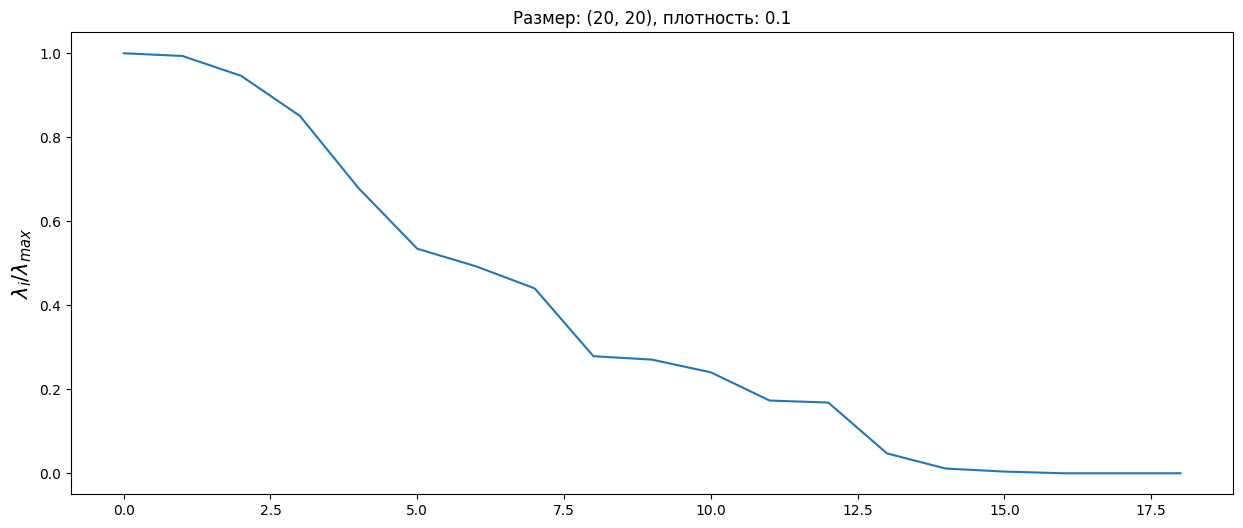

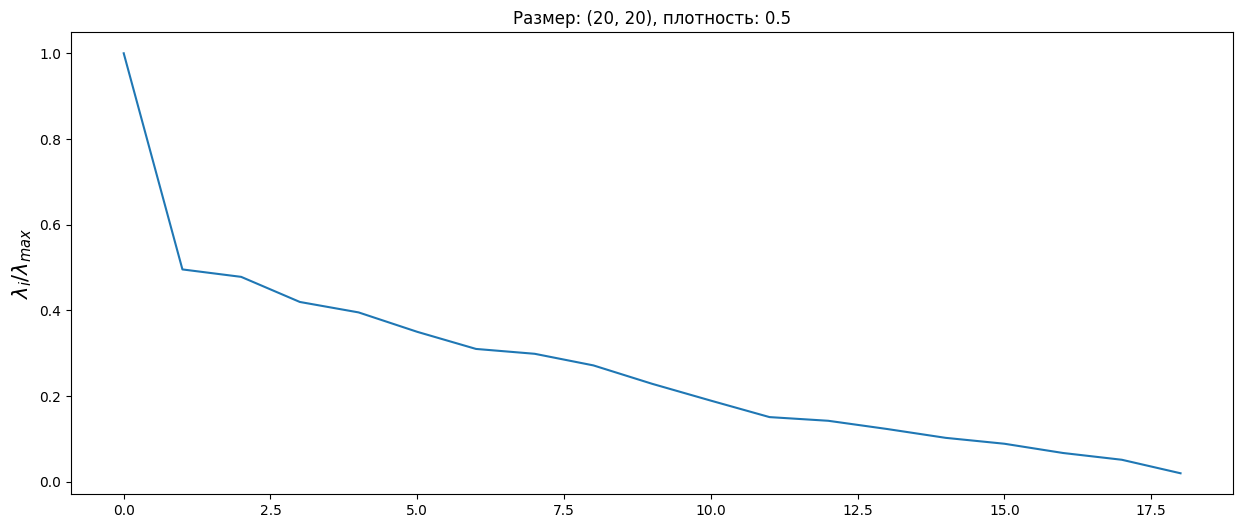

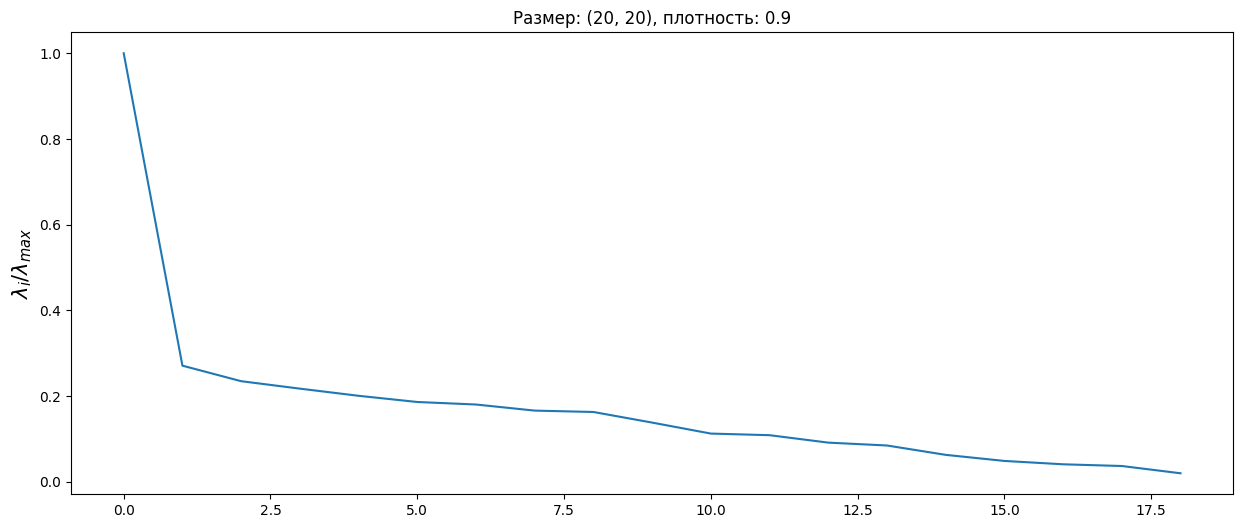

In [15]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np

def singular_values_attenuation_in_sparse(shape:tuple, density:float):
    '''
    Исследует убывание сингулярных чисел в разреженных матрицах
    размера shape и с плотностью density (от 0 до 1)
    '''
    sing_values_sum = np.zeros(min(shape)- 1 )

    sample_size = 100

    for _ in range(sample_size):
        sparse = sp.sparse.rand(shape[0], shape[1],
                           density=density,
                           random_state=42)
        sing_values_sum += sp.sparse.linalg.svds(sparse, k=min(shape)-1,
                                        return_singular_vectors=False)
    plt.figure(figsize=(15, 6))
    plt.title(f'Размер: {shape}, плотность: {density}')
    plt.ylabel(r'$\lambda_i / \lambda_{max}$', fontsize=15)

    mean_vals = sing_values_sum[::-1] / sample_size

    plt.plot(mean_vals / mean_vals[0])

size = 20
singular_values_attenuation_in_sparse((size, size), 0.1)
singular_values_attenuation_in_sparse((size, size), 0.5)
singular_values_attenuation_in_sparse((size, size), 0.9)

Пусть $A=U \Sigma V^*$ SVD для матрицы $A$. Тогда псевдообратная матрица равна:
$$
A^{\dagger}=V \Sigma^{\dagger} U^*
$$

где $\Sigma^{\dagger}$ состоит из обращённых ненулевых сингулярных чисел матрицы $A$. Действительно,
$$
\begin{gathered}
A^{\dagger}=\lim _{\alpha \rightarrow 0}\left(\alpha I+A^* A\right)^{-1} A^*=\lim _{\alpha \rightarrow 0}\left(\alpha V V^*+V \Sigma^2 V^*\right)^{-1} V \Sigma U^*=\lim _{\alpha \rightarrow 0}\left(V\left(\alpha I+\Sigma^2\right) V^*\right)^{-1} V \Sigma U^* \\
=V \lim _{\alpha \rightarrow 0}\left(\alpha I+\Sigma^2\right)^{-1} \Sigma U^*=V \Sigma^{\dagger} U^*
\end{gathered}
$$

- Вы можете проверить, что $\Sigma^{\dagger}$ состоит из обращённых ненулевых сингулярных чисел
- Если сингулярные числа малы, их можно не обращать, а просто приравнять к нулю. Это даст решение, менее чувствительное к шуму в правой части.

Псевдообратная матрица решает задачу минимизации методом наименьших квадратов. Однако она не является самым оптимальным способом решить эту задачу. Более эффективно использовать QR-разложение. Если $A$ имеет полный ранг, то

$$
x=A^{\dagger} b=\left(A^* A\right)^{-1} A^* b=\left((Q R)^*(Q R)\right)^{-1}(Q R)^* b=\left(R^* Q^* Q R\right)^{-1} R^* Q^* b=R^{-1} Q^* b .
$$


Таким образом, необходимо решить следующую квадратную систему: $R x=Q^* b$
- $\quad R$ верхнетреугольная
- Решение требует $\mathcal{O}\left(n^2\right)$ операций
- Более устойчивый способ, чем использование псевдообратной матрицы напрямую.


Выполните следующие задания:

- Напишите программу, которая вычисляет псевдообратную матрицу с помощью SVD. Исследуйте, что происходит с числом обусловленности.

- Напишите решение задачи МНК с помощью вычисления псевдобратной матрицы через SVD

- Реализуйте QR-разложением и сравните с работой алгоритма из предыдущего пункта на случайных матрицах. Отдельно проведите сравнение на разреженных матрицах и плотных, выбирая разное значение density.







#Задача 6*. Итерационное SVD.

Напишите свои собственные функции вычисления SVD простым итерационным методом и с помощью метода вращений Якоби. Сравните их работу с работой библиотечной функции numpy.linalg.svd.


**Описание методов.**

**1. Простой итерационный алгоритм**

Основная процедура — поиск наилучшего приближения произвольной $ m \times n$  матрицы $X=(x_{ij})$ матрицей вида $b \otimes a = (b_i a_j)$ (где b — m-мерный вектор, а a — n-мерный вектор) методом наименьших квадратов:


$F(b, a) = \frac{1}{2}\sum_{i=1}^m \sum_{j=1}^n (x_{ij} - b_i a_j )^2 \to \min$


Решение этой задачи дается последовательными итерациями по явным формулам. При фиксированном векторе $a=(a_j)$  значения $b=(b_i)$ , доставляющие минимум форме $F(b, a)$ , однозначно и явно определяются из равенств $\partial F/ \partial b_i = 0$ :

$\frac{\partial F}{\partial b_i}$ $= - \sum_{j=1}^n (x_{ij} - b_i a_j )a_j = 0$; $b_i = \frac{\sum_{j=1}^n x_{ij}  a_j}{\sum_{j=1}^n a_j^2 } $.


Аналогично, при фиксированном векторе $b =(b_ i)$  определяются значения $a=(a_j)$ :

$a_j = \frac{\sum_{i=1}^m b_i x_{ij} }{\sum_{i =1}^m b_i ^2 } $.


B качестве начального приближения вектора $a$ возьмем случайный вектор единичной длины, вычисляем вектор $b$, далее для этого вектора $b$ вычисляем вектор $a$ и т. д. Каждый шаг уменьшает значение $F(b, a)$ . В качестве критерия остановки используется малость относительного уменьшения значения минимизируемого функционала $F(b, a)$  за шаг итерации $(\Delta F / F )$ или малость самого значения $F$.

В результате для матрицы $X=(x_{ij})$ получили наилучшее приближение матрицей $P_1$ вида $b^1 \otimes a^1 = (b_i^1  a_j^1)$ (здесь верхним индексом обозначен номер итерации). Далее, из матрицы $X$ вычитаем полученную матрицу $P_1$, и для полученной матрицы уклонений $X_1=X-P_1$ вновь ищем наилучшее приближение $P_2 $этого же вида и т. д., пока, например, норма $X_k$ не станет достаточно малой. В результате получили итерационную процедуру разложения матрицы X в виде суммы матриц ранга 1, то есть $X=P_1+P_2+... +P_q $ $(P_l = b^l \otimes a^l) $ . Полагаем  $\sigma_l = \|a^l\| \|b^l\|$ и нормируем векторы  $a^l \, , \, b^l: a^l:= a^l/ \| a^l\|; \, \, b^l:= b^l/ \| b^l\| $. В результате получена аппроксимация сингулярных чисел $ \sigma_l$  и сингулярных векторов (правых —  $a^l$ и левых — $b^l$).

К достоинствам этого алгоритма относится его исключительная простота и возможность почти без изменений перенести его на данные с пробелами, а также взвешенные данные.

Существуют различные модификации базового алгоритма, улучшающие точность и устойчивость. Например, векторы главных компонент $a^l$ при разных $l$ должны быть ортогональны «по построению», однако при большом числе итерации (большая размерность, много компонент) малые отклонения от ортогональности накапливаются и может потребоваться специальная коррекция $a^l$ на каждом шаге, обеспечивающая его ортогональность ранее найденным главным компонентам.

**2. Метод Якоби.**

Метод Якоби (вращений)

На каждом шаге вычисляется вращение Якоби $J$, с помощью которого матрица $G^\top G$ неявно пересчитывается в $J^\top G^\top GJ$; вращение выбрано так, чтобы пара внедиагональных элементов из $G^\top G$ обратилась в нули в матрице $J^\top G^\top GJ$. При этом ни $G^\top G$, ни $J^\top G^\top GJ$ не вычисляются в явном виде; вместо них вычисляется матрица $GJ$. Поэтому алгоритм называется методом односторонних вращений.

Пусть $a_{ij}$ - элемент, расположенный в i-ой строке и j-ом столбце матрицы $G^\top G$.

$τ=(a_{jj}−a_{kk})/(2⋅a_{jk})$

$t=\frac{sign(τ)}{|\tau| + \sqrt{1 + \tau^2}}$. При $τ=0$ считаем $sign(τ)=1$, то есть $θ=\frac{\pi}{4}$.

$c=\frac{1}{\sqrt{1 + t^2}}$, где $c=cosθ$

$s=c⋅t$, где $s=sinθ$

$G=G⋅R(j,k,θ)$

$J=J⋅R(j,k,θ)$

Здесь $R(j,k,θ)$ — матрица вращений Якоби, которая имеет следующий вид:




Одностороннее вращение Якоби в координатной плоскости $i,j$ вычисляется в том случае, если элемент $a_{ij}$ удовлетворяет условию: $|a_{ij}| ≥ε\sqrt{a_{ii}a_{jj}}$.